In [1]:
import metpy.calc as mpcalc
from metpy.units import units
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt


In [2]:
Rd = 287 #J/kgK
cp = 1005 #J/kgK

fog_profiles_file = '/home/smmrrr/dales/build/stable_runs/stable_high_shear/profiles.001.nc'
#fog_profiles_file = './profiles.001.nc'
fog_profiles = xr.open_dataset(fog_profiles_file)

fog_vars_file = '/home/smmrrr/dales/build/stable_runs/stable_high_shear/tmser.001.nc'
#fog_vars_file = './tmser.001.nc'
fog_vars = xr.open_dataset(fog_vars_file)



In [6]:
pres = fog_profiles.variables['presh'].data
pressure = pres/100
virt_theta = fog_profiles.variables['thv'].data
virt_T = virt_theta/((1000/pressure)**(Rd/cp))
thl= fog_profiles.variables['thl'].data

totalwater_q = fog_profiles.variables['qt'].data
liquid_q = fog_profiles.variables['ql'].data
spec_hum = totalwater_q-liquid_q

temp = virt_T/(1+0.61*spec_hum)

pres = pressure*units.hPa
temp = temp*units.K
q = spec_hum
RH = mpcalc.relative_humidity_from_specific_humidity(pres, temp, q)*100
height = fog_profiles.variables['zt'].data
time = fog_vars.variables['time'].data


supersat = np.copy(RH)
supersat[supersat<100] = np.nan
avg_S = np.nanmean(supersat, axis=1)
time_prof = fog_profiles.variables['time'].data



/home/smmrrr/miniconda3/envs/condaforge/lib/python3.10/site-packages/pint/numpy_func.py:768: RuntimeWarning: Mean of empty slice
  ret = func(*bound_args.args, **bound_args.kwargs)


/home/smmrrr/miniconda3/envs/condaforge/lib/python3.10/site-packages/matplotlib/contour.py:1454: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/home/smmrrr/miniconda3/envs/condaforge/lib/python3.10/site-packages/matplotlib/contour.py:1455: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())


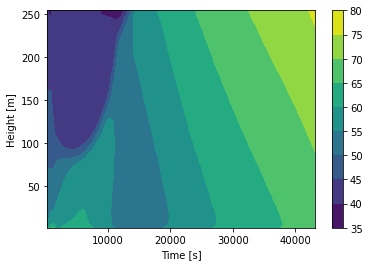

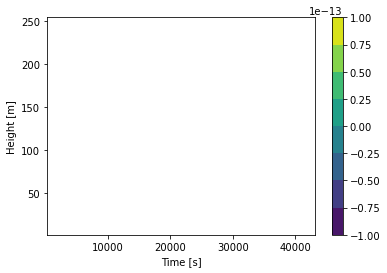

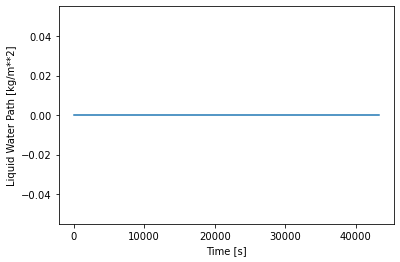

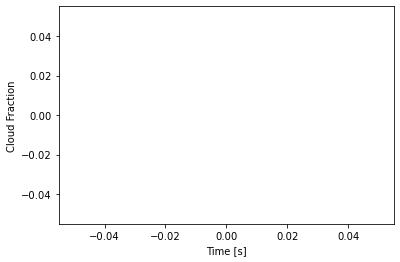

In [8]:
plt.figure(1)
RH1 = np.transpose(RH)
plt.contourf(time_prof, height, RH1)
plt.xlabel('Time [s]')
plt.ylabel('Height [m]')
plt.colorbar()

plt.figure(2)
supersat1 = np.transpose(supersat)
plt.contourf(time_prof, height, supersat1)
plt.xlabel('Time [s]')
plt.ylabel('Height [m]')
plt.colorbar()


LWP = fog_vars.variables['lwp_bar'].data
time = fog_vars.variables['time'].data
cfrac = fog_vars.variables['cfrac'].data

plt.figure(3)
plt.plot(time, LWP)
plt.xlabel('Time [s]')
plt.ylabel('Liquid Water Path [kg/m**2]')

plt.figure(4)
plt.plot(time, cfrac)
plt.xlabel('Time [s]')
plt.ylabel('Cloud Fraction')
plt.show()
